This dataset is originally from UCI Machine Learning Repository. The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset.
The datasets consists of several medical predictor variables and one target variable, Class. Predictor variables includes Blood Pressure(Bp), Albumin(Al), etc.

 build a machine learning model to accurately predict whether or not the patients in the dataset have chronic kidney disease or not

# IMPORTING THE LLIBRARIES

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING THE DATASET

In [65]:
dataset= pd.read_csv(r"D:\work\ml compit\chronic kediny classification\new_model.csv")

In [66]:
dataset

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


# CHEAKING WEATHER THERE IS ANY IMBALANCE IN THA DATASET OR NOT

In [67]:
print(dataset.Class.value_counts())# as we can clearly see that we are having class imbalance

1    250
0    150
Name: Class, dtype: int64


# DOING OVER SAMPLING TO BALANCE THE CLASS

In [68]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = dataset[(dataset['Class']==1)] 
df_minority = dataset[(dataset['Class']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority,n_samples= 250, random_state=0)  
                                                  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

# CHEAKING THE OUTLIRES USING THE BOXPLOT

<AxesSubplot: xlabel='Bp'>

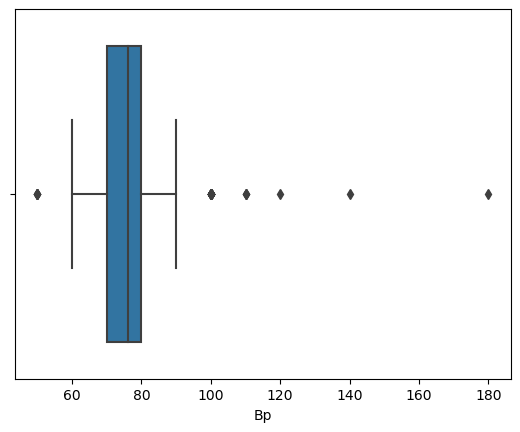

In [69]:
sns.boxplot(x=df2["Bp"])

<AxesSubplot: xlabel='Sg'>

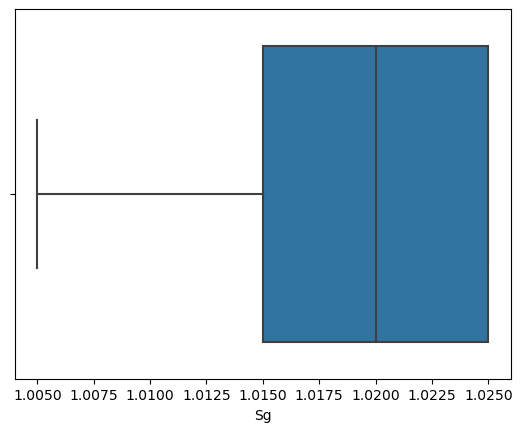

In [70]:
sns.boxplot(x=df2["Sg"])

<AxesSubplot: xlabel='Bu'>

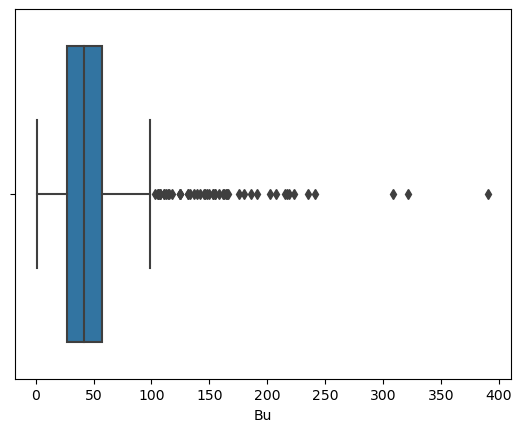

In [71]:
sns.boxplot(x=df2["Bu"])

<AxesSubplot: xlabel='Sc'>

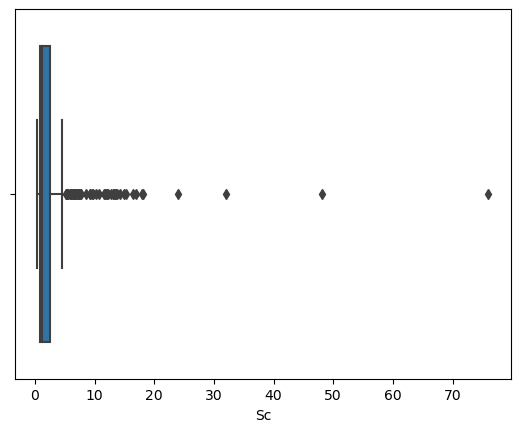

In [72]:
sns.boxplot(x=df2["Sc"])

<AxesSubplot: xlabel='Sod'>

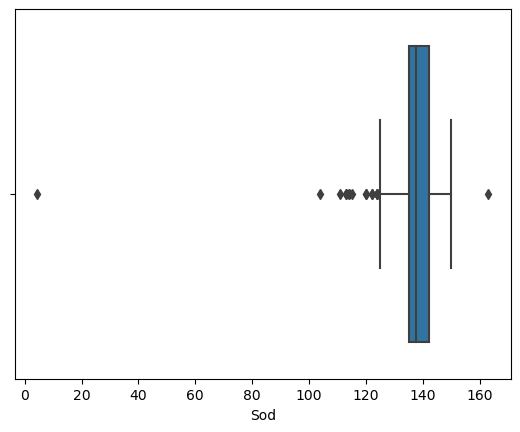

In [73]:
sns.boxplot(x=df2["Sod"])

<AxesSubplot: xlabel='Pot'>

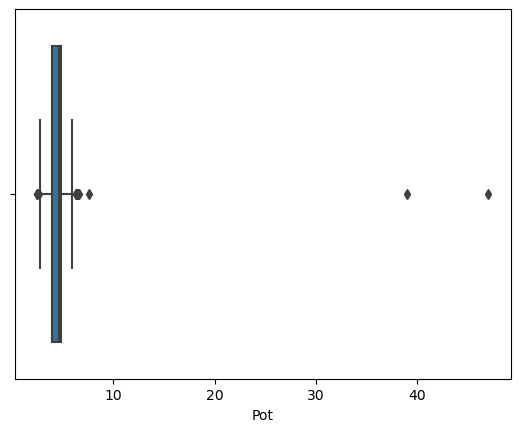

In [74]:
sns.boxplot(x=df2["Pot"])


<AxesSubplot: xlabel='Hemo'>

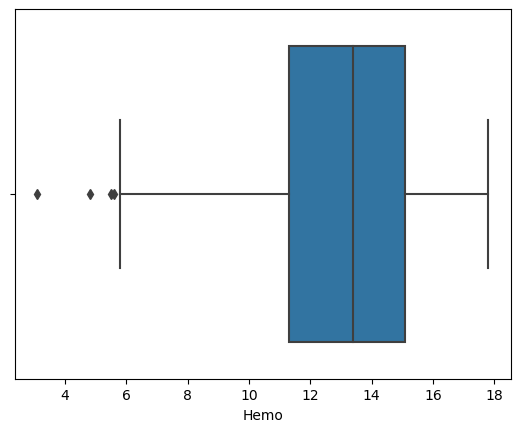

In [75]:
sns.boxplot(x=df2["Hemo"])

<AxesSubplot: xlabel='Wbcc'>

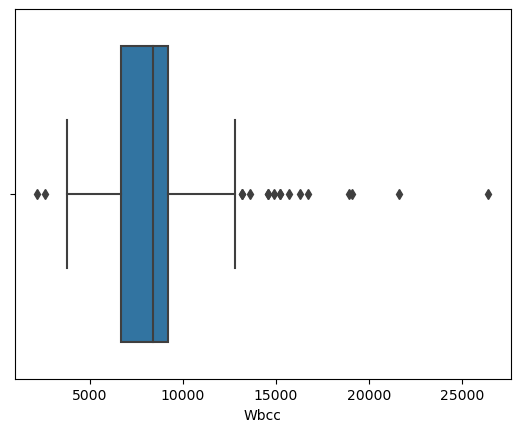

In [76]:
sns.boxplot(x=df2["Wbcc"])

<AxesSubplot: xlabel='Rbcc'>

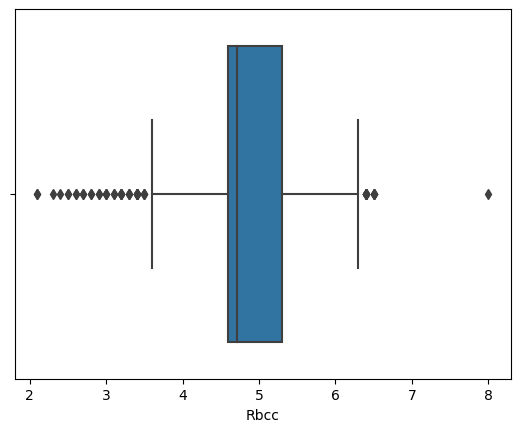

In [77]:
sns.boxplot(x=df2["Rbcc"])

# REMOVING THE OUTLIERS USING Z SCORE

In [78]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis = 1)] 
data_clean.shape

(420, 14)

# BUILDING THE MODEL

In [79]:
x= data_clean.drop('Class',axis=1)
y=data_clean['Class']

SPLITING THE DATA

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [82]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  0]
 [ 0 33]]


# KNearest Neighbor

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.33 %


In [87]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7586206896551725
Precision Score :  0.88
Recall Score :  0.6666666666666666


In [88]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  3]
 [11 22]]


# AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [90]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [91]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  0]
 [ 0 33]]
